In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 월별 전체적인 변화량 확인

In [2]:
label_sum = pd.read_csv('../Data/Preprocessed_data/AirBnB_labels_dong.csv')

# 날짜형 변환
label_sum['Reporting Month'] = pd.to_datetime(label_sum['Reporting Month'])

# 우리 모델의 순서와 일치
label_sum = label_sum.sort_values(by=['Reporting Month', 'Dong_name']).reset_index(drop=True)

In [7]:
label_sum.head()

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0      2017-01-01      가락1동               0.0           0.00   
1      2017-01-01      가락2동               0.0           0.00   
2      2017-01-01      가락본동              92.0        4319.67   
3      2017-01-01      가리봉동               7.0         515.00   
4      2017-01-01       가산동               0.0           0.00   

   Number of Reservations  
0                     0.0  
1                     0.0  
2                    30.0  
3                     5.0  
4                     0.0

In [8]:
many_dongs = pd.read_csv('../Data/Preprocessed_data/many_dong_names.csv')
many_dongs

Dong_name
0        가양1동
1         가회동
2         공덕동
3         광희동
4        구로3동
..        ...
104       화양동
105       황학동
106       회기동
107       회현동
108       후암동

[109 rows x 1 columns]

In [4]:
# label_sum 데이터프레임이 이미 로드되었다고 가정
cols = ['Reservation Days', 'Revenue (USD)', 'Number of Reservations']

# 각 동별 평균과 표준편차 계산
stats = label_sum.groupby('Dong_name')[cols].agg(['mean', 'std'])

# 표준편차가 0인 경우 1로 변경하여 나눗셈 오류 방지
stats.loc[:, (slice(None), 'std')] = stats.loc[:, (slice(None), 'std')].replace(0, 1)

# 정규화된 데이터프레임 생성 (원본 유지)
dong_norm_label_sum = label_sum.copy()

# 각 동별 Z-score 정규화 수행
for col in cols:
    dong_norm_label_sum[col] = dong_norm_label_sum.apply(
        lambda row: (row[col] - stats.loc[row['Dong_name'], (col, 'mean')]) / stats.loc[row['Dong_name'], (col, 'std')], axis=1
    )

# 1. 동별 정규화 결과
dong_norm_label_sum

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동         -1.094569      -0.938107   
1          2017-01-01      가락2동         -1.201413      -1.097208   
2          2017-01-01      가락본동         -0.020646       0.039350   
3          2017-01-01      가리봉동         -0.761678      -0.608202   
4          2017-01-01       가산동         -1.238290      -1.048447   
...               ...       ...               ...            ...   
28403      2022-07-01       효창동         -0.225165       0.349666   
28404      2022-07-01       후암동          0.121720       0.698818   
28405      2022-07-01      휘경1동          3.026162       2.706221   
28406      2022-07-01      휘경2동          1.118379       1.532243   
28407      2022-07-01       흑석동          1.094741       1.948156   

       Number of Reservations  
0                   -1.094646  
1                   -1.108685  
2                    0.017501  
3                   -0.467573  
4                   -1.204577  
...                       ...  
28403                0.143053  
28404                0.163026  
28405                2.641801  
28406                1.188023  
28407                1.881116  

[28408 rows x 5 columns]

In [6]:
stats

Reservation Days             Revenue (USD)                \
                      mean         std          mean           std   
Dong_name                                                            
가락1동             19.761194   18.053867   1343.950448   1432.620031   
가락2동             27.373134   22.784122   1313.158358   1196.818531   
가락본동             93.358209   65.785856   4200.919701   3017.820373   
가리봉동             26.850746   26.061846   1162.008358   1063.805319   
가산동              77.507463   62.592325   2806.059851   2676.397403   
...                    ...         ...           ...           ...   
효창동             158.029851  102.279915   6960.907612   5248.065947   
후암동             997.835821  486.066107  89536.391045  33920.207305   
휘경1동            143.014925  114.331322   5810.105672   4862.516320   
휘경2동             71.208955   55.250542   2179.294179   1535.595249   
흑석동             201.880597  114.291297  10653.580299   5875.478026   

          Number of Reservations              
                            mean         std  
Dong_name                                     
가락1동                    7.298507    6.667458  
가락2동                    9.656716    8.710064  
가락본동                   29.641791   20.467788  
가리봉동                    9.582090    9.799736  
가산동                    17.940299   14.893440  
...                          ...         ...  
효창동                    40.059701   27.544389  
후암동                   362.477612  150.420558  
휘경1동                   47.194030   40.429227  
휘경2동                   22.223881   15.804507  
흑석동                    56.835821   30.920032  

[424 rows x 6 columns]

In [10]:
# 2. label 로그화 데이터
label_sum_log = label_sum.copy() 
log_cols = ['Reservation Days', 'Revenue (USD)', 'Number of Reservations']


for col in log_cols:
    label_sum_log[col] = np.log1p(label_sum_log[col])  # log(1 + x) 변환 적용
    
label_sum_log

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동          0.000000       0.000000   
1          2017-01-01      가락2동          0.000000       0.000000   
2          2017-01-01      가락본동          4.532599       8.371166   
3          2017-01-01      가리봉동          2.079442       6.246107   
4          2017-01-01       가산동          0.000000       0.000000   
...               ...       ...               ...            ...   
28403      2022-07-01       효창동          4.912655       9.082164   
28404      2022-07-01       후암동          6.964136      11.637277   
28405      2022-07-01      휘경1동          6.194405       9.850622   
28406      2022-07-01      휘경2동          4.897840       8.419183   
28407      2022-07-01       흑석동          5.793014      10.003375   

       Number of Reservations  
0                    0.000000  
1                    0.000000  
2                    3.433987  
3                    1.791759  
4                    0.000000  
...                       ...  
28403                3.806662  
28404                5.961005  
28405                5.043425  
28406                3.737670  
28407                4.753590  

[28408 rows x 5 columns]

In [8]:
label_sum_log.describe()

Reporting Month  Reservation Days  Revenue (USD)  \
count                          28408      28408.000000   28408.000000   
mean   2019-10-01 08:57:18.805970176          3.826734       7.155790   
min              2017-01-01 00:00:00          0.000000       0.000000   
25%              2018-05-01 00:00:00          2.639057       6.254002   
50%              2019-10-01 00:00:00          4.043051       7.880572   
75%              2021-03-01 00:00:00          5.262690       9.228663   
max              2022-07-01 00:00:00         10.902942      15.565459   
std                              NaN          2.186761       3.392957   

       Number of Reservations  
count            28408.000000  
mean                 2.868148  
min                  0.000000  
25%                  1.386294  
50%                  2.833213  
75%                  4.127134  
max                  9.797905  
std                  1.904469

In [9]:
# 3. sum 정규화 
from sklearn.preprocessing import StandardScaler

# 데이터 복사
df = label_sum.copy()

# 숫자형 열만 선택 (datetime 및 object 제외)
df_numeric = df.select_dtypes(include=['number'])

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# 원본 데이터프레임에 정규화된 값 적용
label_sum_norm = df.copy()
label_sum_norm[df_numeric.columns] = df_scaled

label_sum_norm

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동         -0.211665      -0.189729   
1          2017-01-01      가락2동         -0.211665      -0.189729   
2          2017-01-01      가락본동         -0.156808      -0.157099   
3          2017-01-01      가리봉동         -0.207491      -0.185839   
4          2017-01-01       가산동         -0.211665      -0.189729   
...               ...       ...               ...            ...   
28403      2022-07-01       효창동         -0.131169      -0.123285   
28404      2022-07-01       후암동          0.418593       0.665683   
28405      2022-07-01      휘경1동          0.079911      -0.046437   
28406      2022-07-01      휘경2동         -0.132361      -0.155493   
28407      2022-07-01       흑석동         -0.016685      -0.022787   

       Number of Reservations  
0                   -0.216455  
1                   -0.216455  
2                   -0.161066  
3                   -0.207223  
4                   -0.216455  
...                       ...  
28403               -0.135218  
28404                0.498055  
28405                0.067872  
28406               -0.140757  
28407               -0.004132  

[28408 rows x 5 columns]

In [11]:
# 4. sum log 변환 후 정규화
# 데이터 복사
df = label_sum_log.copy()

# 숫자형 열만 선택 (datetime 및 object 제외)
df_numeric = df.select_dtypes(include=['number'])

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# 원본 데이터프레임에 정규화된 값 적용
label_sum_log_norm = df.copy()
label_sum_log_norm[df_numeric.columns] = df_scaled

label_sum_log_norm

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동         -1.749987      -2.109050   
1          2017-01-01      가락2동         -1.749987      -2.109050   
2          2017-01-01      가락본동          0.322796       0.358212   
3          2017-01-01      가리봉동         -0.799047      -0.268114   
4          2017-01-01       가산동         -1.749987      -2.109050   
...               ...       ...               ...            ...   
28403      2022-07-01       효창동          0.496597       0.567767   
28404      2022-07-01       후암동          1.434751       1.320844   
28405      2022-07-01      휘경1동          1.082749       0.794257   
28406      2022-07-01      휘경2동          0.489822       0.372364   
28407      2022-07-01       흑석동          0.899190       0.839278   

       Number of Reservations  
0                   -1.506036  
1                   -1.506036  
2                    0.297117  
3                   -0.565201  
4                   -1.506036  
...                       ...  
28403                0.492805  
28404                1.624029  
28405                1.142216  
28406                0.456577  
28407                0.990027  

[28408 rows x 5 columns]

In [12]:
label_sum_log_norm.describe()

Reporting Month  Reservation Days  Revenue (USD)  \
count                          28408      2.840800e+04   2.840800e+04   
mean   2019-10-01 08:57:18.805970176      1.470709e-16   7.003378e-18   
min              2017-01-01 00:00:00     -1.749987e+00  -2.109050e+00   
25%              2018-05-01 00:00:00     -5.431312e-01  -2.657870e-01   
50%              2019-10-01 00:00:00      9.892292e-02   2.136174e-01   
75%              2021-03-01 00:00:00      6.566705e-01   6.109449e-01   
max              2022-07-01 00:00:00      3.235989e+00   2.478610e+00   
std                              NaN      1.000018e+00   1.000018e+00   

       Number of Reservations  
count            2.840800e+04  
mean             3.021457e-16  
min             -1.506036e+00  
25%             -7.781063e-01  
50%             -1.834363e-02  
75%              6.610814e-01  
max              3.638746e+00  
std              1.000018e+00

# 동별 변화량 확인

In [32]:
from matplotlib import cm, pyplot as plt
import matplotlib.font_manager as fm

def plot_dong_time_series(df1, y, title):
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False

    # 'Reporting Month'가 datetime이 아니라면 변환
    if not pd.api.types.is_datetime64_any_dtype(df1['Reporting Month']):
        df1['Reporting Month'] = pd.to_datetime(df1['Reporting Month'])

    fig, ax = plt.subplots(figsize=(12, 6))

    # 20개의 색상을 생성 (tab20은 최대 20개)
    colors = cm.get_cmap('tab20', 20)

    # 변수(y) 기준 상위 10개 동 선택
    top_10_dongs_df1 = df1.groupby('Dong_name')[y].sum().nlargest(10).index

    # 각 동에 대해 시계열 그리기
    for idx, dong in enumerate(df1['Dong_name'].unique()):
        df_dong = df1[df1['Dong_name'] == dong]
        color = colors(idx % 20)

        if dong in top_10_dongs_df1:
            ax.plot(df_dong['Reporting Month'], df_dong[y], label=dong, marker='o', color=color)
        else:
            ax.plot(df_dong['Reporting Month'], df_dong[y], color=color, alpha=0.3)

    ax.set_title(f'{y} over time with {title}')
    ax.set_xlabel('Reporting Month')
    ax.set_ylabel(y)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()


In [33]:
def get_many_dongs(df):
    return df[df['Dong_name'].isin(many_dongs['Dong_name'])]

dfs = [label_sum, label_sum_log, label_sum_norm, label_sum_log_norm, dong_norm_label_sum]
titles = ['sum', 'log', 'sum_norm', 'log_norm', 'dong_norm']

# Reservation Days

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


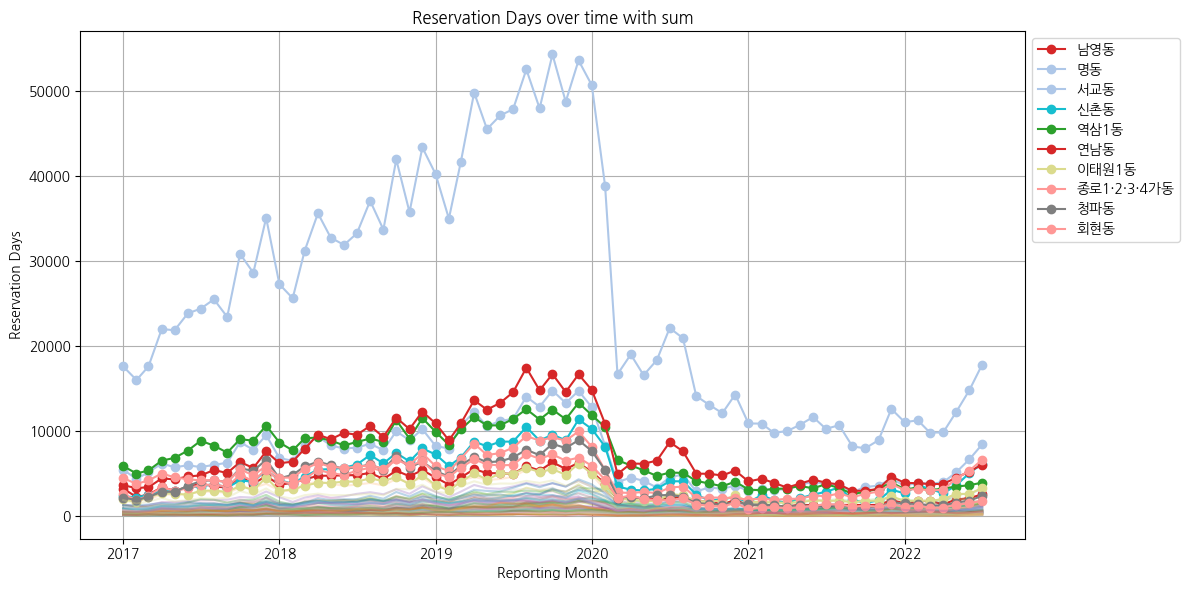

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


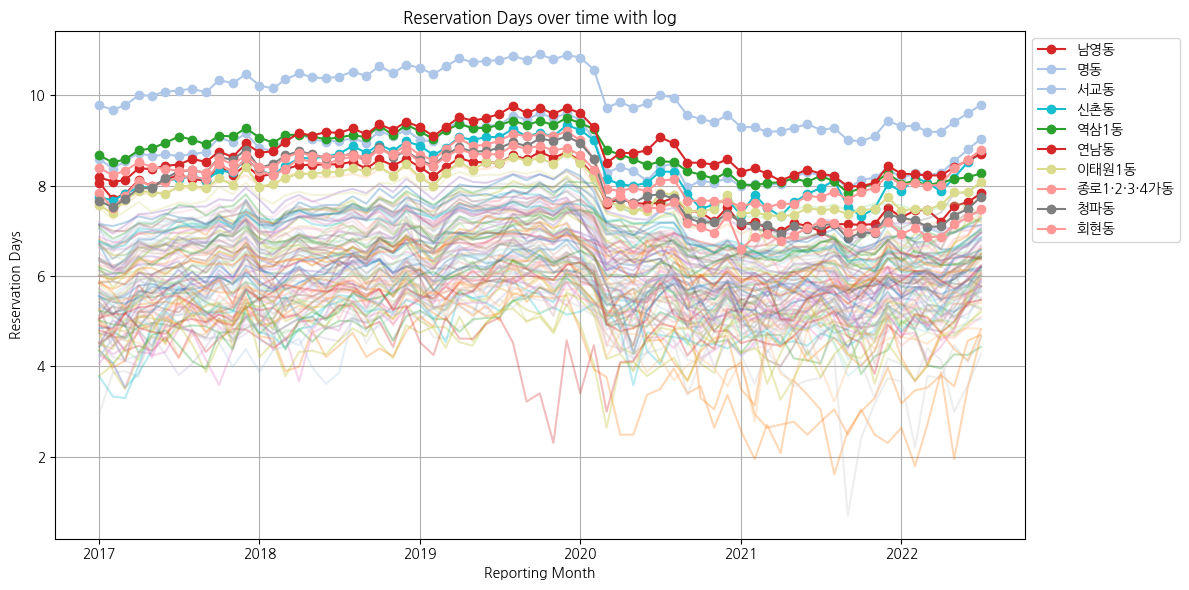

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


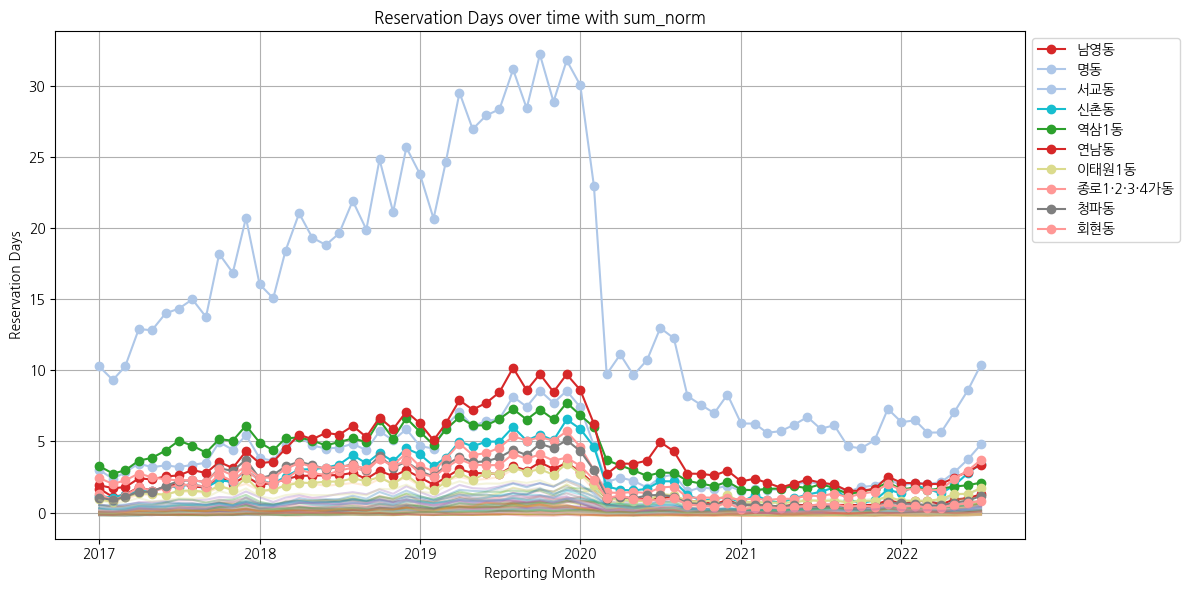

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


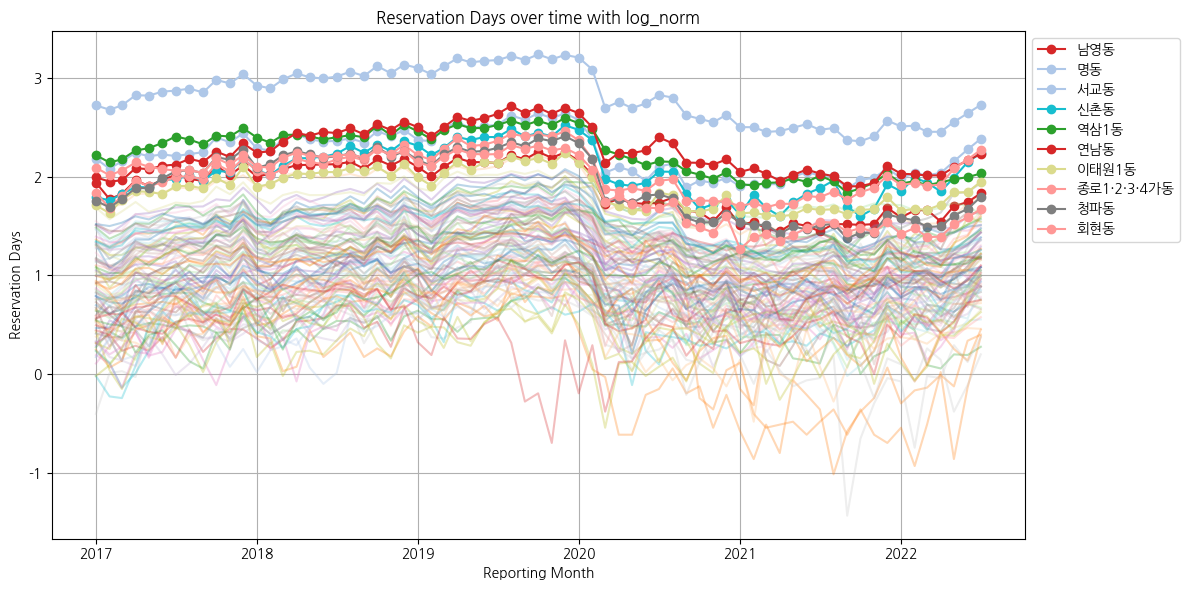

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


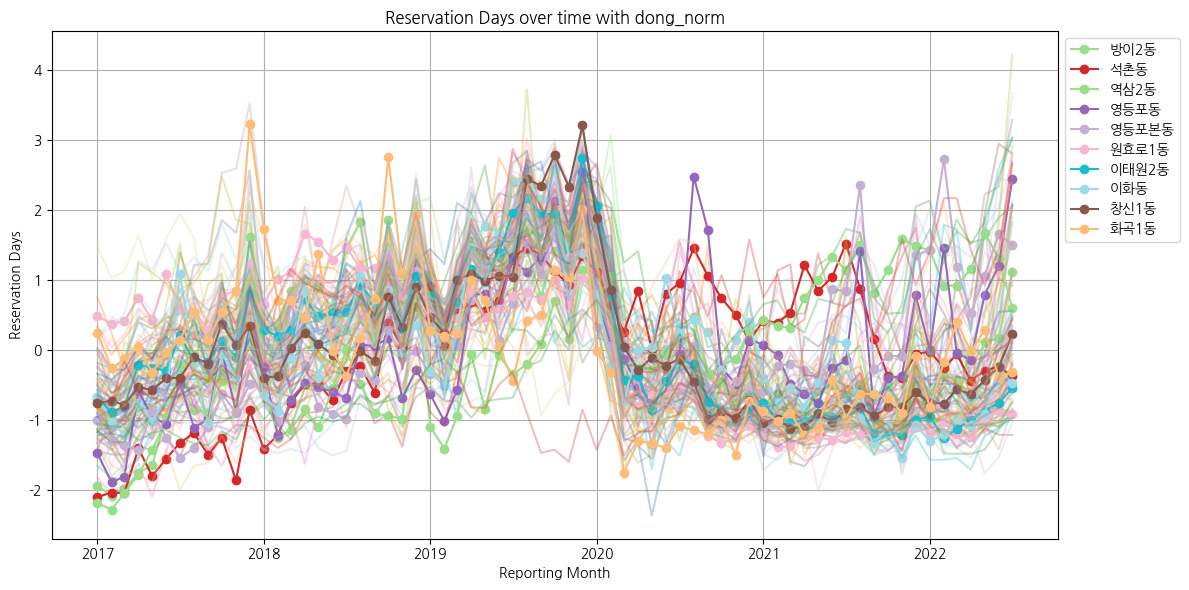

In [35]:
for df, title in zip(dfs, titles):
    plot_dong_time_series(get_many_dongs(df), 'Reservation Days', title)

# Revenue

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


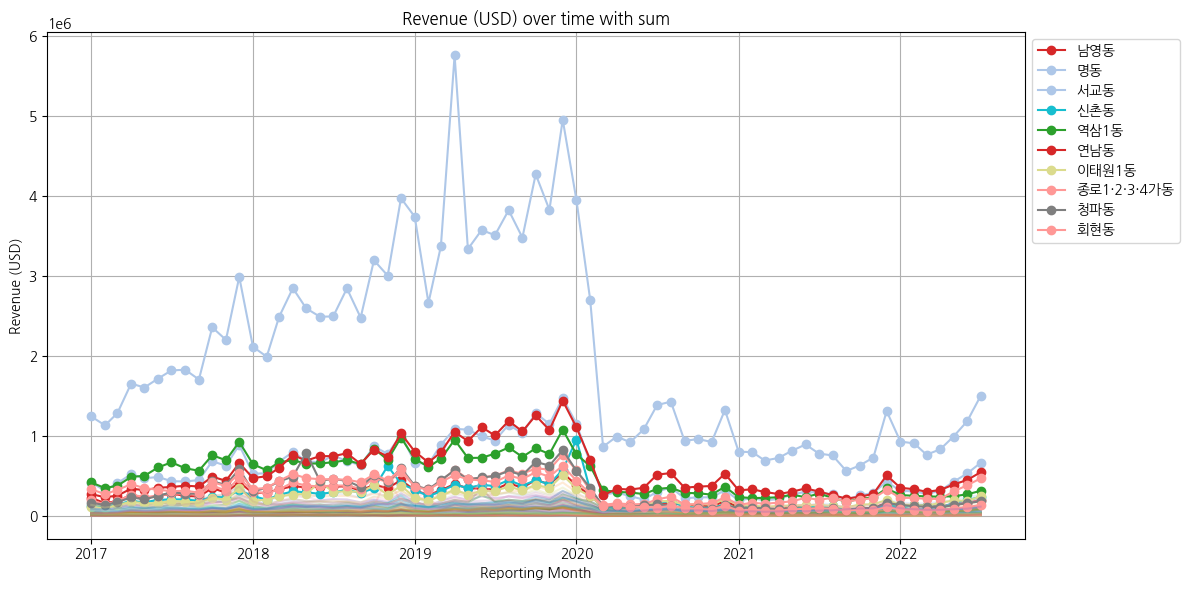

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


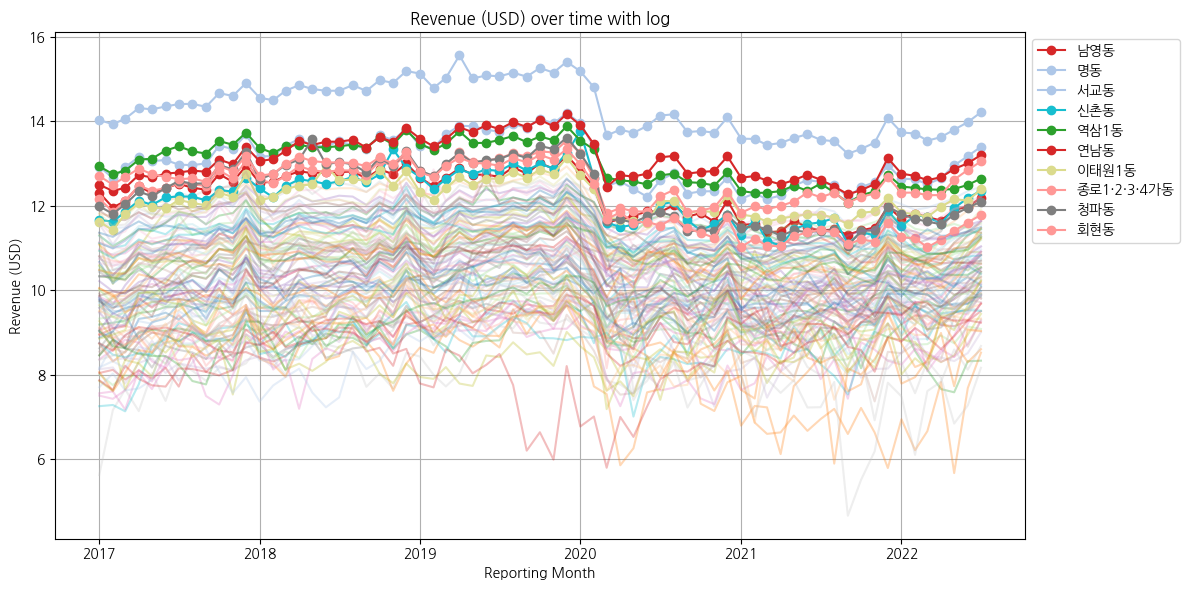

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


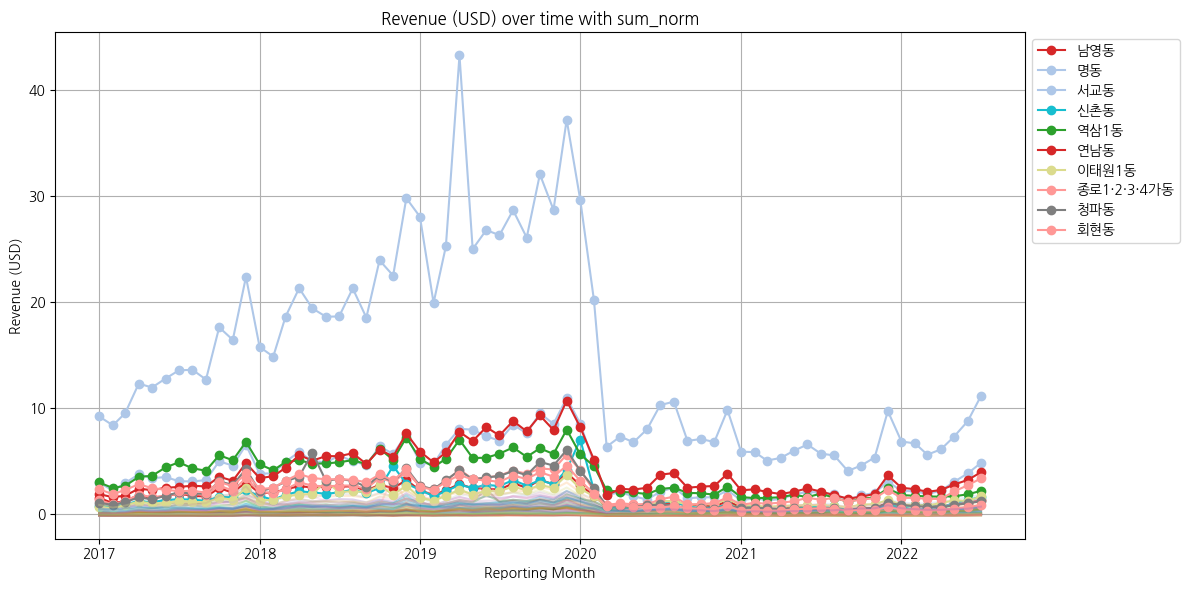

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


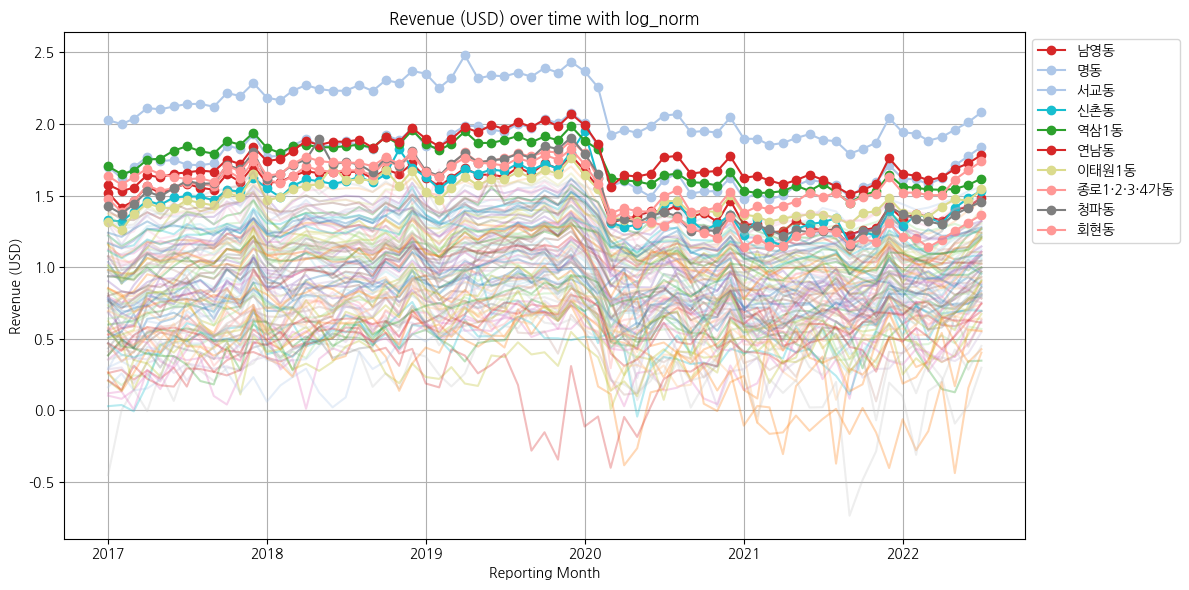

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


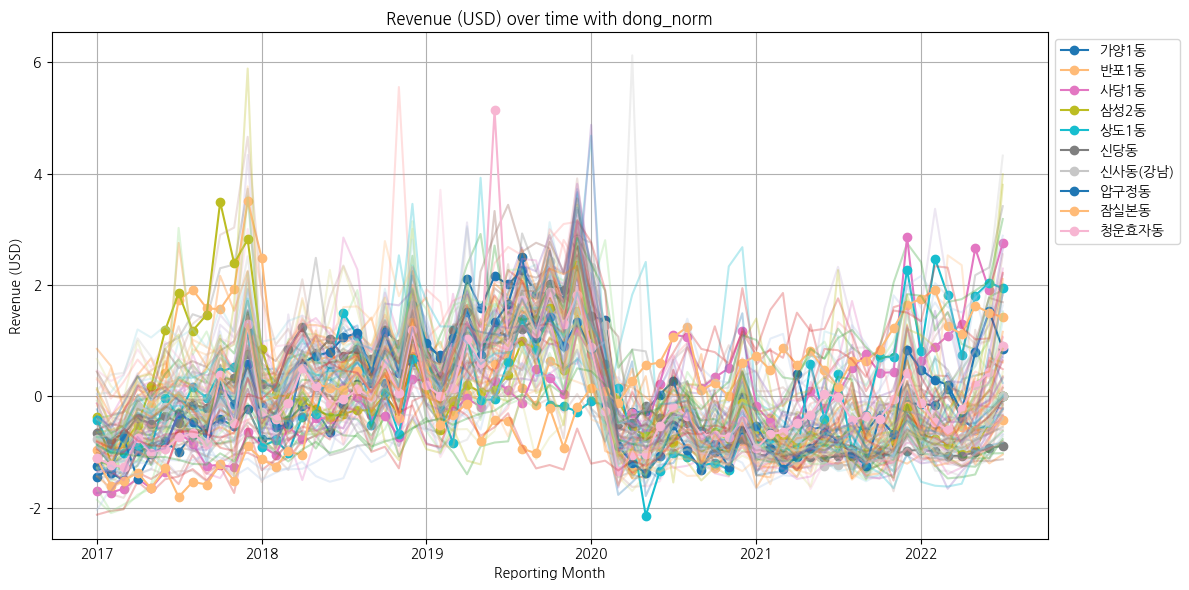

In [36]:
for df, title in zip(dfs, titles):
    plot_dong_time_series(get_many_dongs(df), 'Revenue (USD)', title)

# Number of Reservations

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


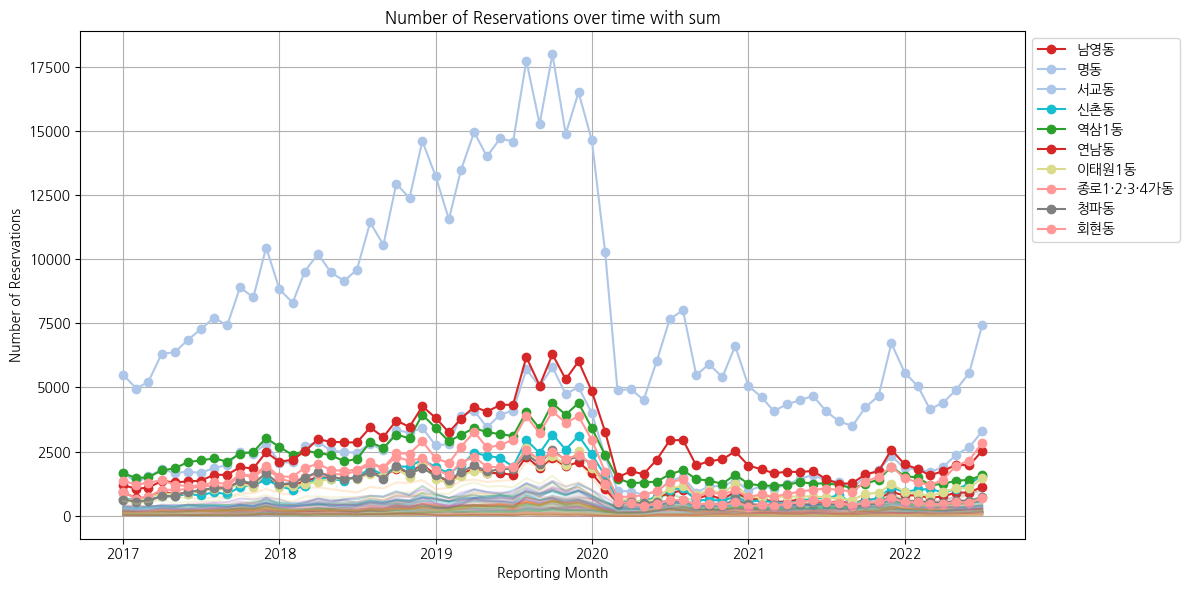

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


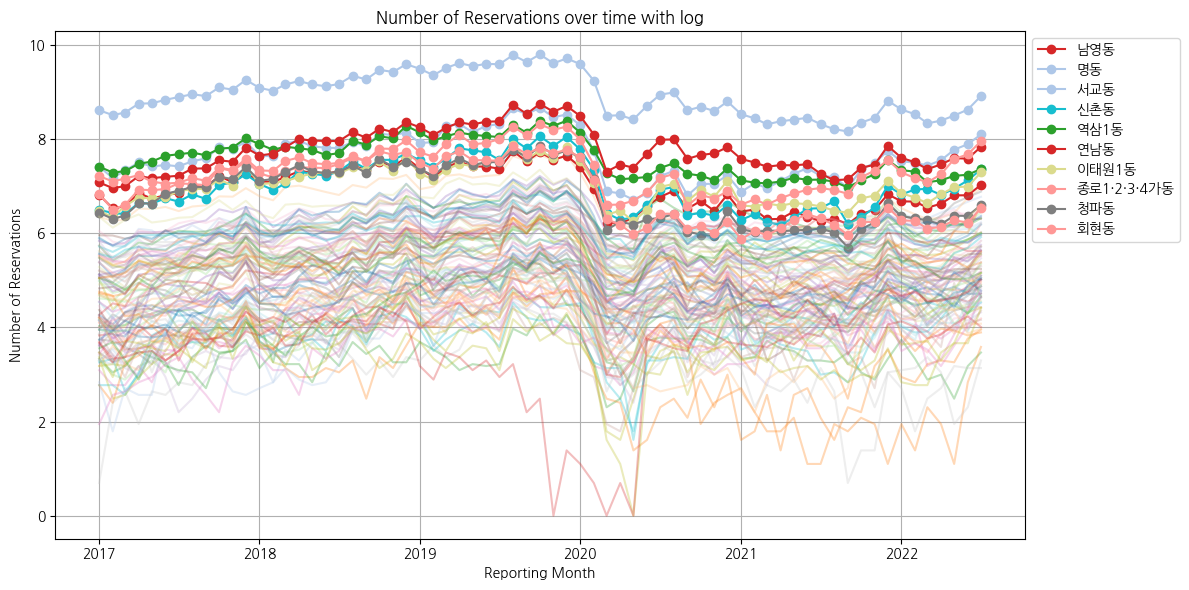

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


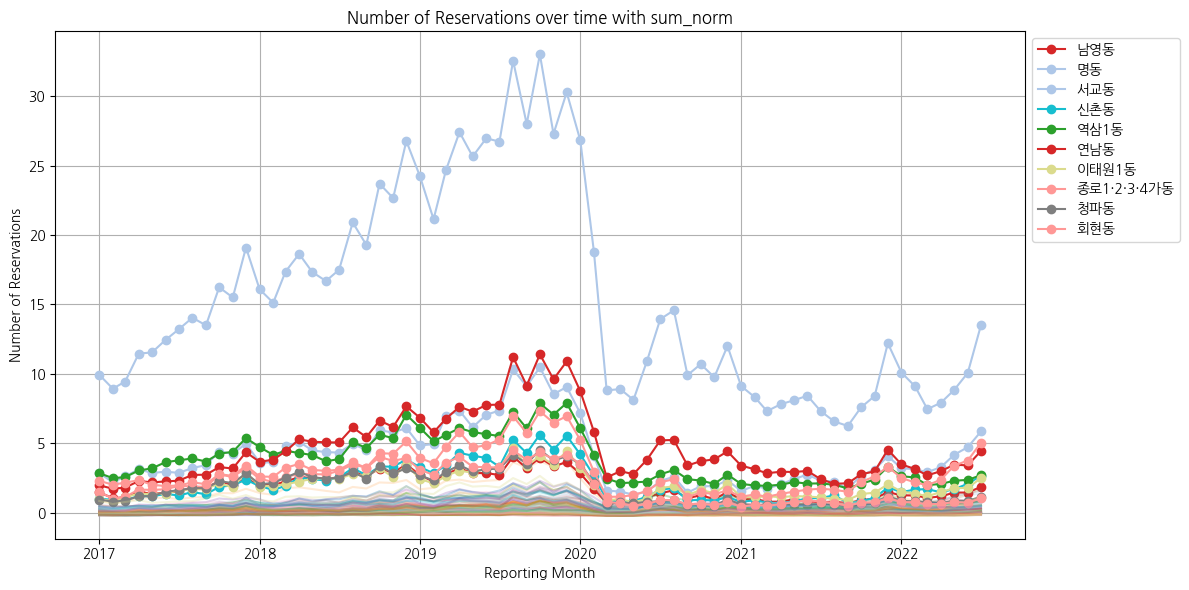

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


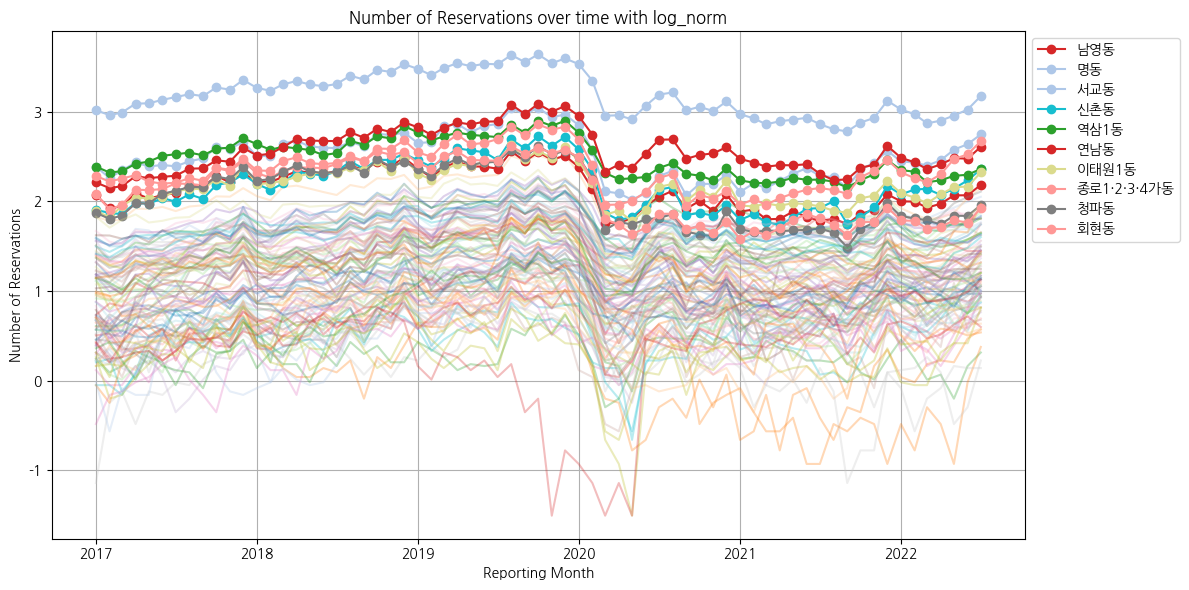

/tmp/ipykernel_757074/4334802.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 20)


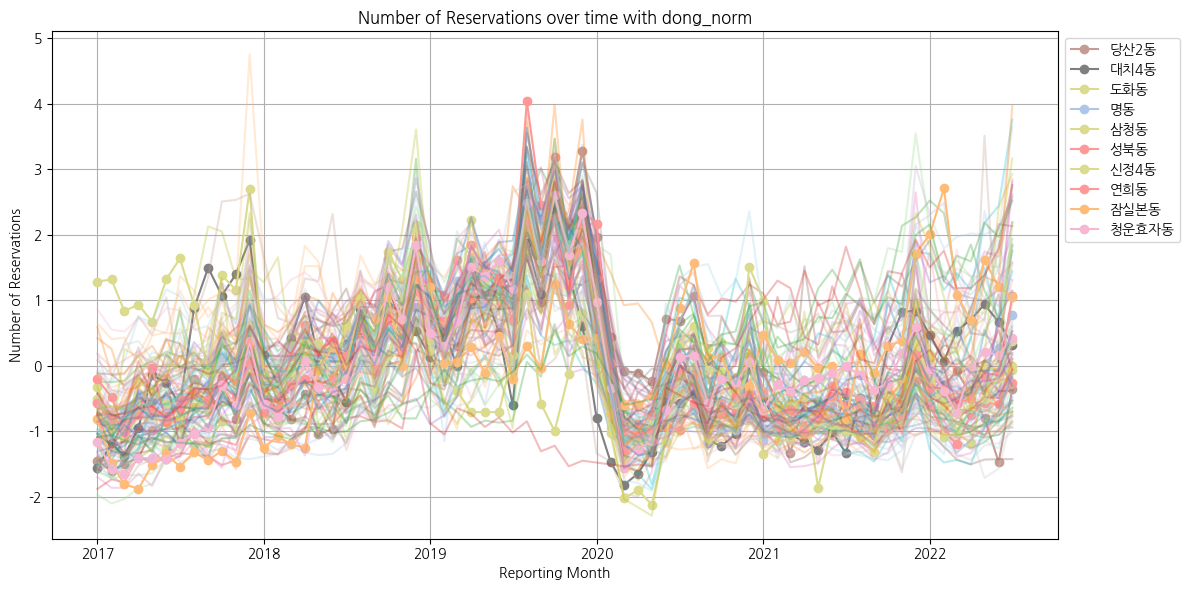

In [37]:
for df, title in zip(dfs, titles):
    plot_dong_time_series(get_many_dongs(df), 'Number of Reservations', title)

# Label별 상관관계 확인

In [42]:
label = get_many_dongs(label_sum)
label

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
5          2017-01-01      가양1동             210.0        8309.43   
8          2017-01-01       가회동             740.0      105468.23   
24         2017-01-01       공덕동             902.0       65104.47   
29         2017-01-01       광희동            2090.0      135869.28   
33         2017-01-01      구로3동             185.0        9795.66   
...               ...       ...               ...            ...   
28399      2022-07-01       화양동            1426.0       76636.85   
28400      2022-07-01       황학동             455.0       33185.87   
28401      2022-07-01       회기동             509.0       16065.24   
28402      2022-07-01       회현동            1770.0      131853.48   
28404      2022-07-01       후암동            1057.0      113240.44   

       Number of Reservations  
5                        64.0  
8                       349.0  
24                      249.0  
29                      571.0  
33                       55.0  
...                       ...  
28399                   554.0  
28400                   208.0  
28401                   150.0  
28402                   684.0  
28404                   387.0  

[7303 rows x 5 columns]

In [52]:
val = label[(label['Reporting Month'] >= '2021-04-01') & (label['Reporting Month'] <= '2021-11-01')]
test = label[(label['Reporting Month'] >= '2021-12-01') & (label['Reporting Month'] <= '2022-11-01')]
train = label[label['Reporting Month'] <= '2021-03-01']

In [46]:
def label_corr(df, range):
    # 상관관계 확인할 컬럼 선택
    cols = ['Reservation Days', 'Revenue (USD)', 'Number of Reservations']

    # 상관계수 행렬 계산
    corr_matrix = df[cols].corr(method='pearson')

    # 히트맵 시각화
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title(f'상관관계 행렬 {range}')
    plt.show()

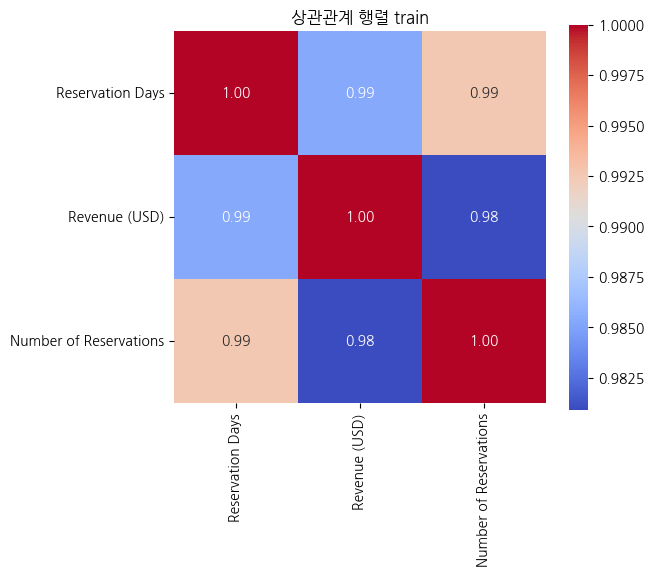

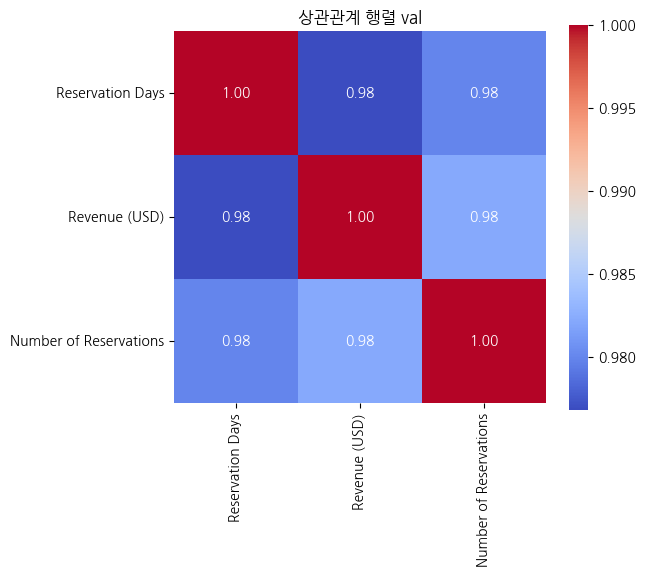

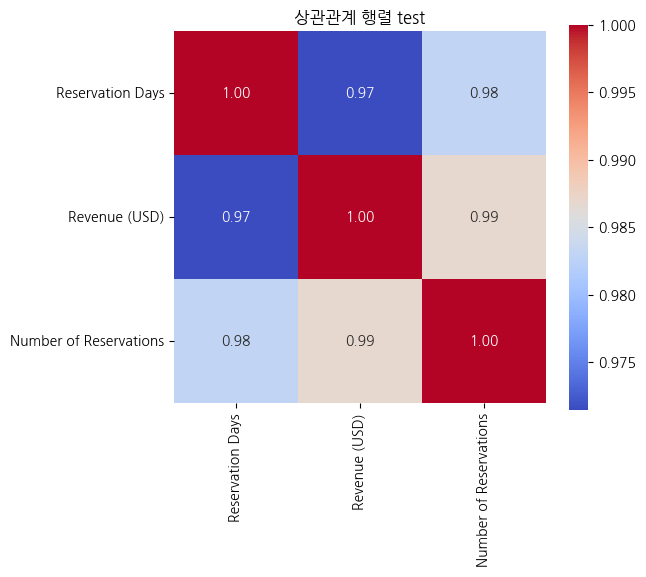

In [53]:
label_corr(train, 'train')
label_corr(val, 'val')
label_corr(test, 'test')


[Label: Reservation Days]

[Label: Revenue (USD)]

[Label: Number of Reservations]


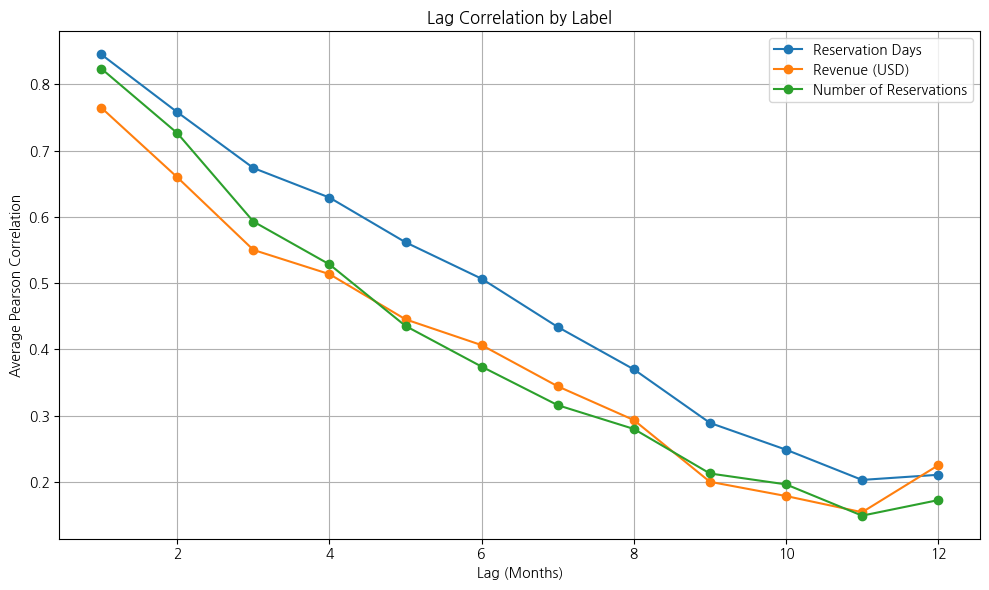

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 라벨 목록
label_cols = ["Reservation Days", "Revenue (USD)", "Number of Reservations"]

# dong별로 groupby
grouped = label.groupby('Dong_name')

# 결과 저장
lag_corrs = {l: [] for l in label_cols}
lags = list(range(1, 13))  # 1개월 ~ 12개월 lag

# 각 label에 대해 lag correlation 계산
for l in label_cols:
    print(f"\n[Label: {l}]")
    
    for lag in lags:
        correlations = []
        
        for dong, group in grouped:
            group = group.sort_values('Reporting Month')
            # lag 만큼 시프트해서 현재와 미래 비교
            shifted = group[l].shift(lag)
            corr = group[l].corr(shifted)
            
            if not np.isnan(corr):
                correlations.append(corr)

        mean_corr = np.mean(correlations)
        lag_corrs[l].append(mean_corr)

# 시각화
plt.figure(figsize=(10, 6))
for l in label_cols:
    plt.plot(lags, lag_corrs[l], marker='o', label=l)

plt.xlabel('Lag (Months)')
plt.ylabel('Average Pearson Correlation')
plt.title('Lag Correlation by Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



[Label: Reservation Days]


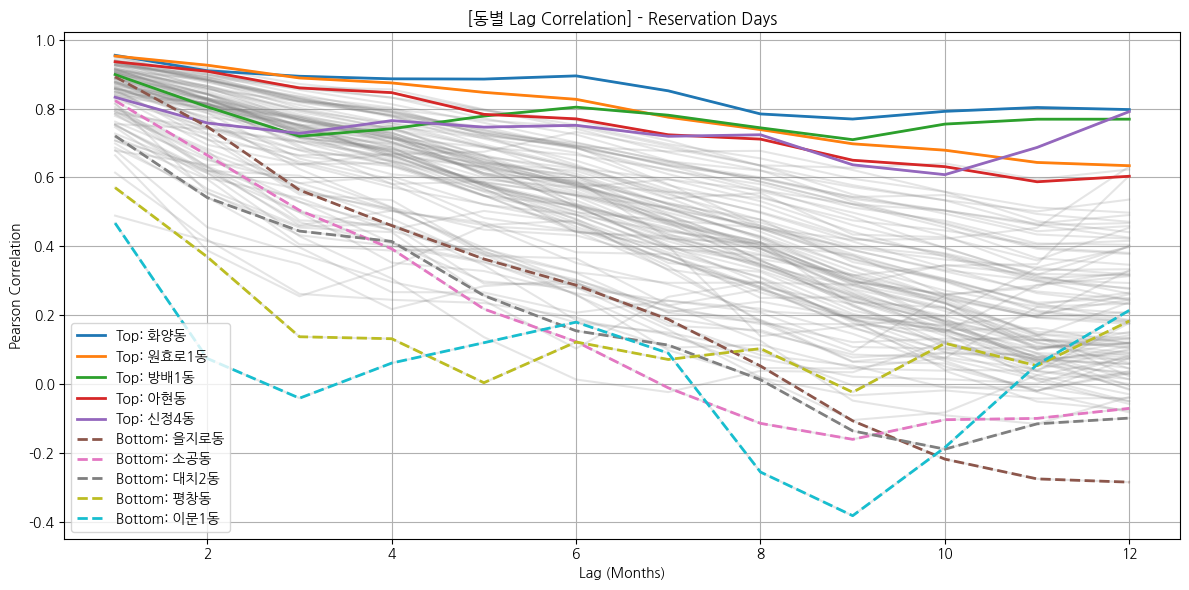


[Label: Revenue (USD)]


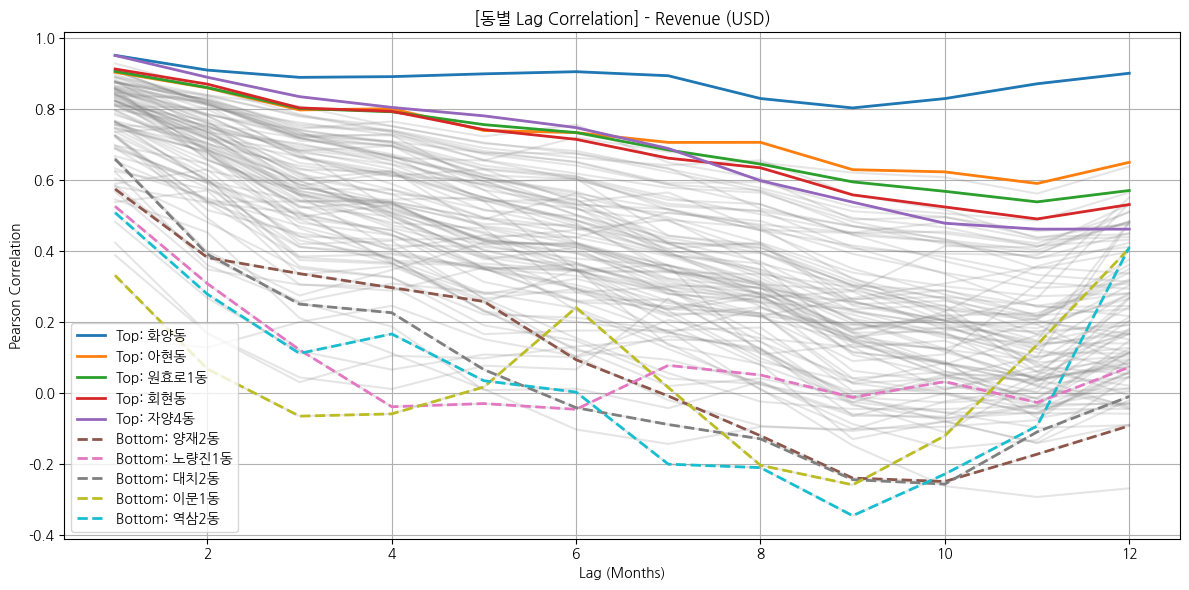


[Label: Number of Reservations]


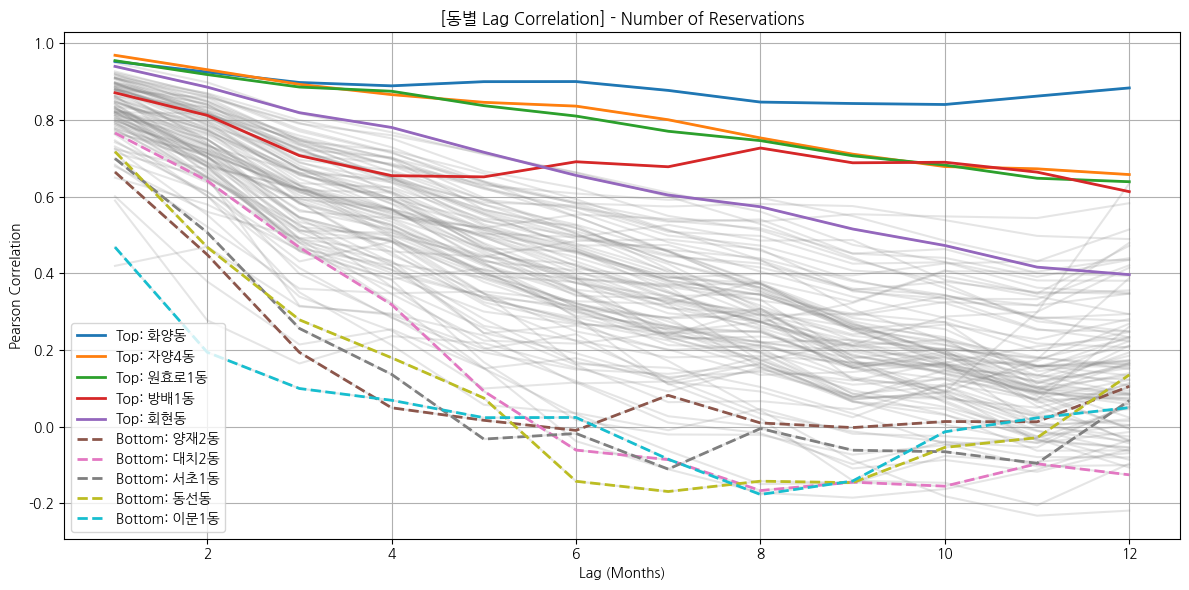

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

label_cols = ["Reservation Days", "Revenue (USD)", "Number of Reservations"]
lags = list(range(1, 13))
grouped = label.groupby('Dong_name')

top_k = 5  # 상위/하위 k개 동 표시

for l in label_cols:
    print(f"\n[Label: {l}]")

    # 각 동별 평균 상관관계 저장
    dong_corr_dict = {}

    plt.figure(figsize=(12, 6))

    for dong, group in grouped:
        group = group.sort_values('Reporting Month')
        correlations = []

        for lag in lags:
            shifted = group[l].shift(lag)
            corr = group[l].corr(shifted)
            correlations.append(0 if np.isnan(corr) else corr)

        mean_corr = np.mean(correlations)
        dong_corr_dict[dong] = (correlations, mean_corr)

    # 상위/하위 k개 동 정렬
    sorted_dongs = sorted(dong_corr_dict.items(), key=lambda x: x[1][1], reverse=True)
    top_dongs = sorted_dongs[:top_k]
    bottom_dongs = sorted_dongs[-top_k:]

    # 전체 라인 그리기
    for dong, (corrs, _) in dong_corr_dict.items():
        plt.plot(lags, corrs, color='gray', alpha=0.2)

    # 상위 동: 파란색
    for dong, (corrs, _) in top_dongs:
        plt.plot(lags, corrs, label=f"Top: {dong}", linewidth=2)

    # 하위 동: 빨간색
    for dong, (corrs, _) in bottom_dongs:
        plt.plot(lags, corrs, label=f"Bottom: {dong}", linewidth=2, linestyle='dashed')

    plt.xlabel('Lag (Months)')
    plt.ylabel('Pearson Correlation')
    plt.title(f'[동별 Lag Correlation] - {l}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# 유동 인구 데이터 확인

In [ ]:
hf_df = pd.read_csv('../Data/Preprocessed_data/Dong/Human_flow.csv')
#hf_df.columns

In [30]:
hf_trend = hf_df.groupby('Reporting Month', as_index=False)[["Total Population", "Total Long-Term Foreigner Population", "Total Short-Term Foreigner Population"]].mean()
hf_trend

Reporting Month  Total Population  Total Long-Term Foreigner Population  \
0       2017-01-01      25720.088446                           1000.114529   
1       2017-02-01      26207.023458                           1000.177157   
2       2017-03-01      26185.087757                           1011.406135   
3       2017-04-01      25798.634867                            989.974730   
4       2017-05-01      25653.641679                            958.362389   
..             ...               ...                                   ...   
62      2022-03-01      24434.694722                            899.704239   
63      2022-04-01      24410.770083                            899.630568   
64      2022-05-01      24749.387481                            913.047563   
65      2022-06-01      24997.836778                            921.046424   
66      2022-07-01      24296.853413                            897.727592   

    Total Short-Term Foreigner Population  
0                              476.305433  
1                              459.534104  
2                              483.996915  
3                              491.255802  
4                              448.647038  
..                                    ...  
62                             236.995567  
63                             221.582859  
64                             260.286838  
65                             287.972095  
66                             304.272191  

[67 rows x 4 columns]

/tmp/ipykernel_275840/889367609.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


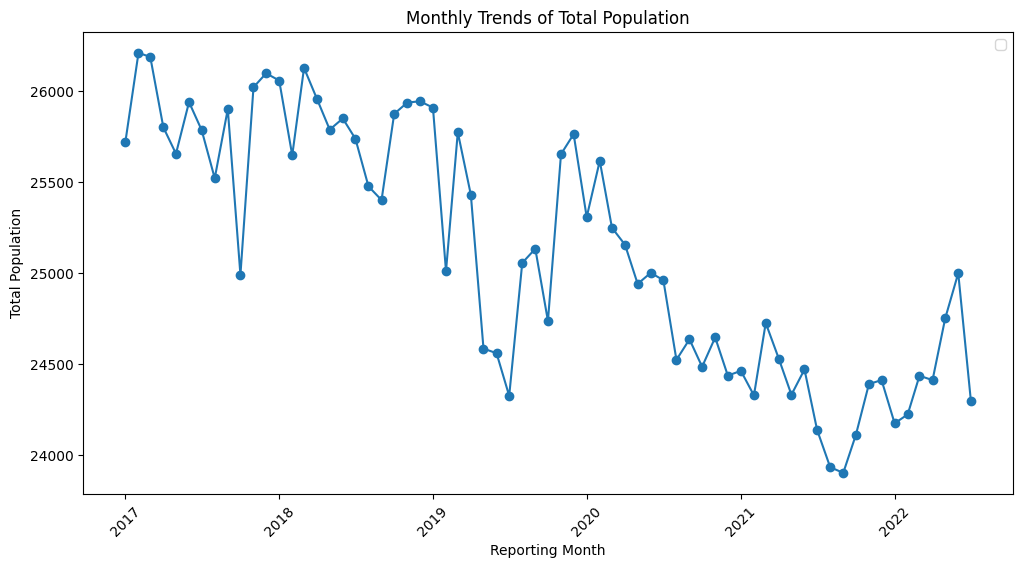

In [32]:
trend_graph(hf_trend, 'Total Population')

/tmp/ipykernel_275840/889367609.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


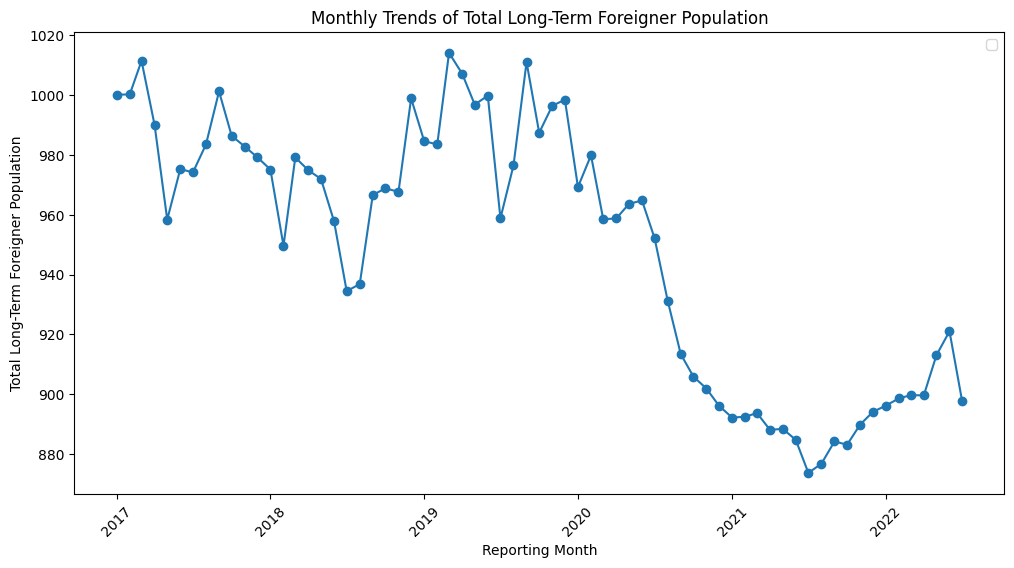

In [33]:
trend_graph(hf_trend, 'Total Long-Term Foreigner Population')

/tmp/ipykernel_275840/889367609.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


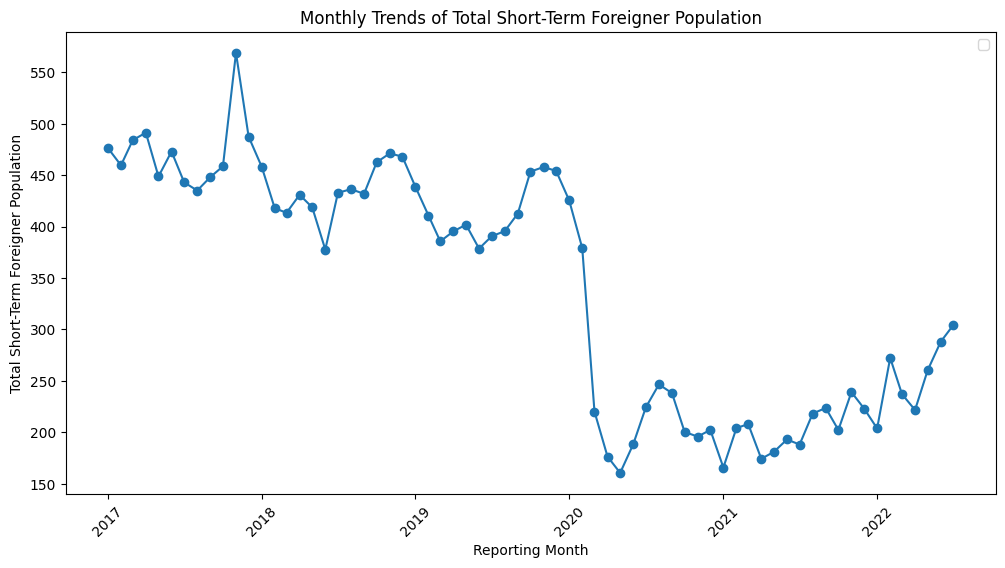

In [34]:
trend_graph(hf_trend, "Total Short-Term Foreigner Population")

In [35]:
airbnb_llm = ['Gemma_nolisting_raw', 'Gemma_nolisting_refined', 'Llama_mixed_raw', 'Llama_mixed_refined', 'Llama_nolisting_raw', 'Llama_nolisting_refined', 'Llama_only_listings']


In [36]:
for llm_name in airbnb_llm:
    ex_df = pd.read_csv(f'../Data/Preprocessed_data/Dong/llm_embeddings/AirBnB_{llm_name}.csv')
    print(ex_df.shape)

(28408, 2306)
(28408, 2306)
(28408, 3074)
(28408, 3074)
(28408, 3074)
(28408, 3074)
(28408, 3074)
